In [22]:
%autosave 180
%load_ext autoreload
%autoreload 2

Autosaving every 180 seconds
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# !pip install catboost

In [24]:
from catboost import CatBoostRanker, Pool, MetricVisualizer, cv
import pandas as pd
pd.set_option('max_columns', None)
import os

# Params

In [37]:
CAT_FEATURES = ['srch_id',
                'site_id',
                'visitor_location_country_id',
                'prop_country_id',
                'prop_id',
                'srch_destination_id',
                'week_id', 
#                 'season_num', 'day', 'month', 'year', 'quarter', 'week', 'dow'
               ]

# bool_cols = ['prop_brand_bool',
#              'promotion_flag',
#              'srch_saturday_night_bool',
#              'random_bool']

# drop_cols = ['usr_extra_pay']

group_col = 'srch_id'
predict_item_col = 'prop_id'
ranking_target = 'target'

# Read data

In [27]:
data_path = 'data'

In [28]:
X_train = pd.read_pickle(os.path.join(data_path, 'X_train.pickle'))
y_train = pd.read_pickle(os.path.join(data_path, 'y_train.pickle'))
groups_train = X_train[group_col] #pd.read_pickle(os.path.join(data_path, 'groups_train.pickle'))

print('X_train.shape', X_train.shape)
X_train.head()

X_train.shape (4017836, 159)


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_inv,comp1_rate_percent_diff,comp2_inv,comp2_rate_percent_diff,comp3_inv,comp3_rate_percent_diff,comp4_inv,comp4_rate_percent_diff,comp5_inv,comp5_rate_percent_diff,comp6_inv,comp6_rate_percent_diff,comp7_inv,comp7_rate_percent_diff,comp8_inv,comp8_rate_percent_diff,was_sold_in_that_period,hour,minute,morning_booking,afternoon_booking,evening_booking,late_evening_booking,night_booking,work_hour_booking,lunch_booking,day,month,year,quarter,week,dow,doy,days_in_month,is_weekend,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,week_id,season_num,week_summer_index,day_sin,day_cos,month_sin,month_cos,quarter_sin,quarter_cos,week_sin,week_cos,dow_sin,dow_cos,doy_sin,doy_cos,season_num_sin,season_num_cos,trans_ocean,prop_location_score_diff,prop_location_score_diff_7,prop_location_score_sum,prop_location_score_sum_7,prop_location_score_mul,prop_location_score_diff_log,prop_location_score_sum_log,prop_location_score_mul_log,travel_inside,higher_price_than_expedia,lower_price_than_expedia,same_price_as_expedia,comp_num_avail,ratio_of_comp_with_higher_price_than_expedia,ratio_of_comp_with_lower_price_than_expedia,comp1_rate_percent_diff_signed,comp2_rate_percent_diff_signed,comp3_rate_percent_diff_signed,comp4_rate_percent_diff_signed,comp5_rate_percent_diff_signed,comp6_rate_percent_diff_signed,comp7_rate_percent_diff_signed,comp8_rate_percent_diff_signed,price_usd_pow_0.33,price_usd_pow_0.5,price_usd_pow_2,price_usd_log_2,price_usd_log_10,price_usd_log_2.72,price_usd_reciprocal,visitor_hist_adr_usd_pow_0.33,visitor_hist_adr_usd_pow_0.5,visitor_hist_adr_usd_pow_2,visitor_hist_adr_usd_log_2,visitor_hist_adr_usd_log_10,visitor_hist_adr_usd_log_2.72,visitor_hist_adr_usd_reciprocal,prop_log_historical_price_pow_0.33,prop_log_historical_price_pow_0.5,prop_log_historical_price_pow_2,prop_log_historical_price_log_2,prop_log_historical_price_log_10,prop_log_historical_price_log_2.72,prop_log_historical_price_reciprocal,comp1_rate_percent_diff_log_2,comp1_rate_percent_diff_log_10,comp2_rate_percent_diff_log_2,comp2_rate_percent_diff_log_10,comp3_rate_percent_diff_log_2,comp3_rate_percent_diff_log_10,comp4_rate_percent_diff_log_2,comp4_rate_percent_diff_log_10,comp5_rate_percent_diff_log_2,comp5_rate_percent_diff_log_10,comp6_rate_percent_diff_log_2,comp6_rate_percent_diff_log_10,comp7_rate_percent_diff_log_2,comp7_rate_percent_diff_log_10,comp8_rate_percent_diff_log_2,comp8_rate_percent_diff_log_10,price_diff_to_usr_hist,price_ratio_to_usr_hist,price_diff_to_place_hist_price,place_hist_price_diff_usr_hist,booking_weeks_ahead,booking_months_ahead,len_of_stay_to_booking_ahead_ratio,len_of_stay_to_booking_ahead_diff,srch_length_of_stay_in_weeks,children_per_adult,total_people,people_per_room,separate_children_room,srch_query_affinity_score_prob
0,1,233427,12,187,NaN,NaN,219,893,3.0,3.5,1,2.83,0.0438,4.95,104.769997,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,True,8,32,True,False,False,False,False,True,False,4,4,2013,2,14,4,94,30,0,0,0,0,0,0,0,201314,2,11,0.724793,0.688967,0.866025,-0.5,0,-1,0.992709,-0.120537,-0.433884,-0.900969,0.999079,-0.042905,0,-1,False,2.7862,2.5234,2.8738,3.1366,0.123954,7.342892,-1.682892,-12.771485,False,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.641712,10.235722,10976.751953,6.711082,2.020237,4.648830,0.009545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.695195,2.224859,24.502499,2.307428,0.694605,1.598378,0.202020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [29]:
X_train.dtypes.value_counts()#.apply(lambda x: x.name).to_dict()

float32    105
uint8       30
bool        11
uint16       4
int8         4
uint32       4
int16        1
dtype: int64

In [30]:
train_pool = Pool(data=X_train, 
                  label=y_train,
                  group_id=groups_train,
                  cat_features=CAT_FEATURES,
                  )

In [31]:
X_val = pd.read_pickle(os.path.join(data_path, 'X_val.pickle'))
y_val = pd.read_pickle(os.path.join(data_path, 'y_val.pickle'))
groups_val = X_val[group_col] # pd.read_pickle(os.path.join(data_path, 'groups_val.pickle'))

val_pool = Pool(data=X_val,
                label=y_val,
                group_id=groups_val,
                cat_features=CAT_FEATURES,
                )

# Cross-validation

In [ ]:
# %%time

# params = {
#     "iterations": 1000,
#     #           'loss_function': 'NDCG:top=5',
#     'loss_function': 'QueryRMSE',
#     'custom_metric': [
#         'NDCG:top=5;type=Base;denominator=LogPosition'
#         #                       , 'PFound', 'AverageGain:top=10'
#     ],
#     "verbose": False,
#     'early_stopping_rounds': 50,
#     #     'logging_level': 'Silent',
# }

# cv_results, fitted_models = cv(train_pool, params, nfold=3, type='TimeSeries', plot=True,
#                                return_models=True)

In [ ]:
# cv_results

In [ ]:
# model = fitted_models[-1]

In [ ]:
# import matplotlib.pyplot as plt

# for method in ['LossFunctionChange', 'PredictionValuesChange']:
#     fi = model.get_feature_importance(test_pool, type=method)
#     feature_score_raw = pd.DataFrame(list(zip(X_test.columns, fi)),
#                                      columns=['Feature', 'Score'])

#     feature_score = feature_score_raw.sort_values(
#         by='Score', ascending=False)

#     plt.rcParams["figure.figsize"] = (7, len(feature_score) / 4)
#     ax = feature_score.plot('Feature', 'Score', kind='barh', color='c')
#     ax.set_title("Feature Importance using {}".format(method), fontsize=14)
#     ax.set_xlabel("features")
#     ax.invert_yaxis()
#     plt.show()

In [ ]:
# model.get_all_params()

# Fit final model

In [84]:
params = {
    "iterations": 700, # make 1500
    'loss_function': 'YetiRank', # YetiRankPairwise
    'custom_metric': ['NDCG:top=5;type=Base;denominator=LogPosition', 'MAP:top=5'],
#     'eval_metric': 'NDCG:top=5;type=Base;denominator=LogPosition',
    "verbose": False,
    'early_stopping_rounds': 100,
    'use_best_model': True,
#     has_time
}

In [85]:
model = CatBoostRanker(**params)
model.fit(train_pool, eval_set=val_pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [86]:
model.get_best_score()

{'learn': {'MAP:top=5': 0.7413729036174016},
 'validation': {'NDCG:type=Base': 0.49870042090536876,
  'NDCG:top=5;type=Base': 0.3697006981300741,
  'MAP:top=5': 0.31075203289709546}}

# Eval

In [87]:
X_test = pd.read_pickle(os.path.join(data_path, 'X_test.pickle'))
y_test = pd.read_pickle(os.path.join(data_path, 'y_test.pickle'))
groups_test = X_test[group_col]#pd.read_pickle(os.path.join(data_path, 'groups_test.pickle'))

test_pool = Pool(
    data=X_test,
    label=y_test,
    group_id=groups_test,
    cat_features=CAT_FEATURES,
)

In [88]:
from utils import predict_in_format

In [92]:
predict_in_format(model, X_train, train_pool, group_col, predict_item_col, gt_col=y_train);

Local test NDCG@5: 0.12225345322771326


In [93]:
predict_in_format(model, X_val, val_pool, group_col, predict_item_col, gt_col=y_val);

Local test NDCG@5: 0.36971388897161966


In [94]:
predict_in_format(model, X_test, test_pool, group_col, predict_item_col, gt_col=y_test);

Local test NDCG@5: 0.37758894844869545


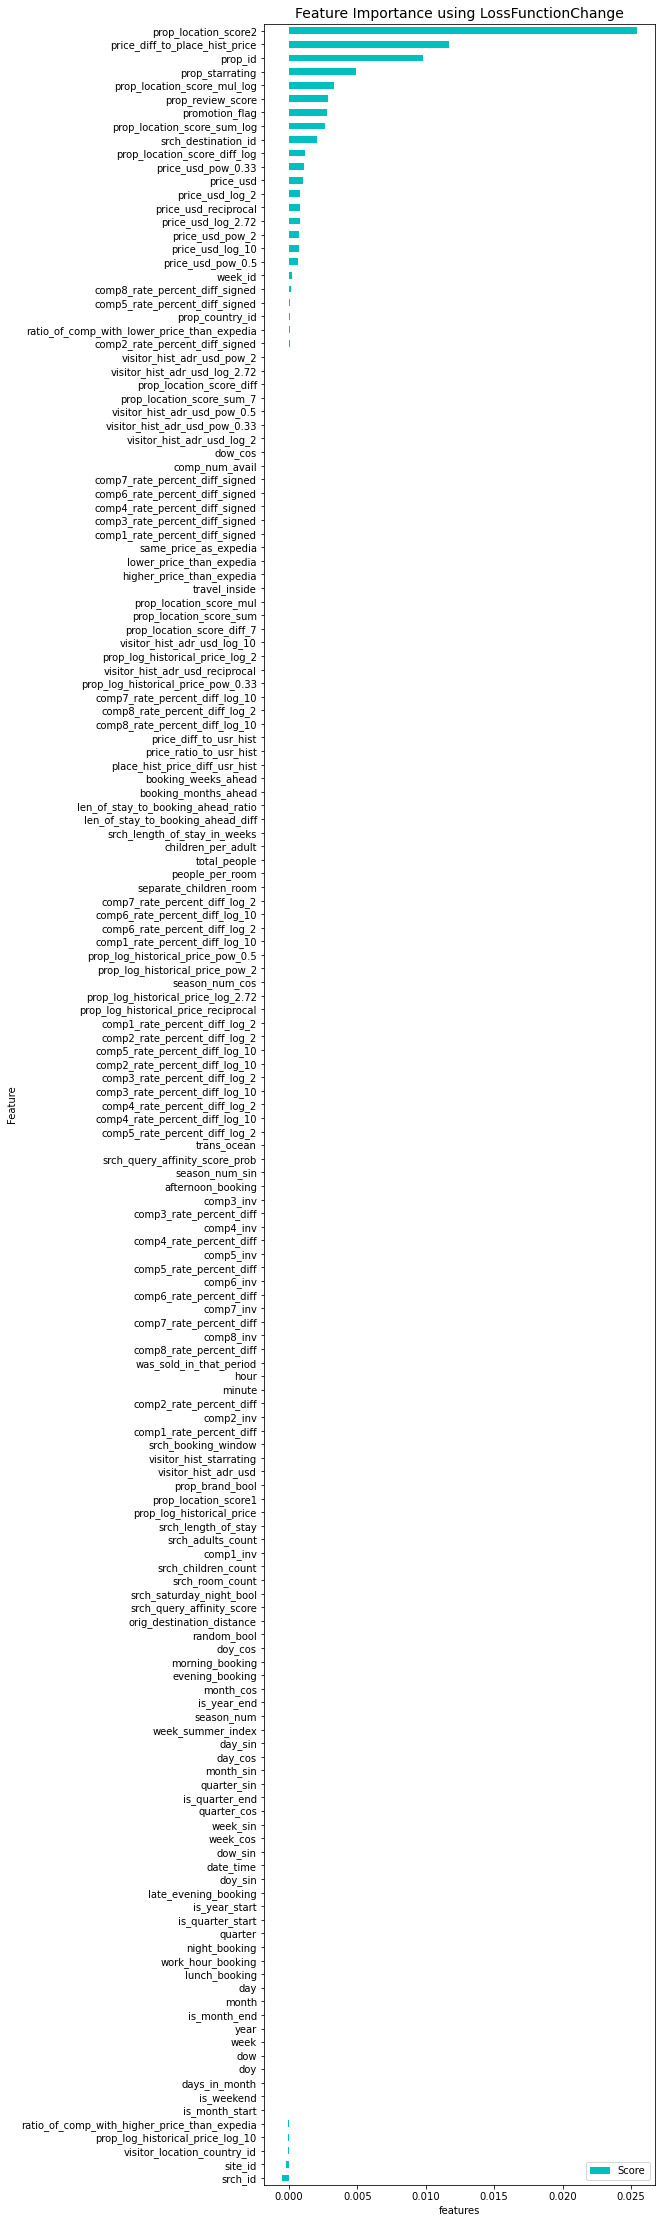

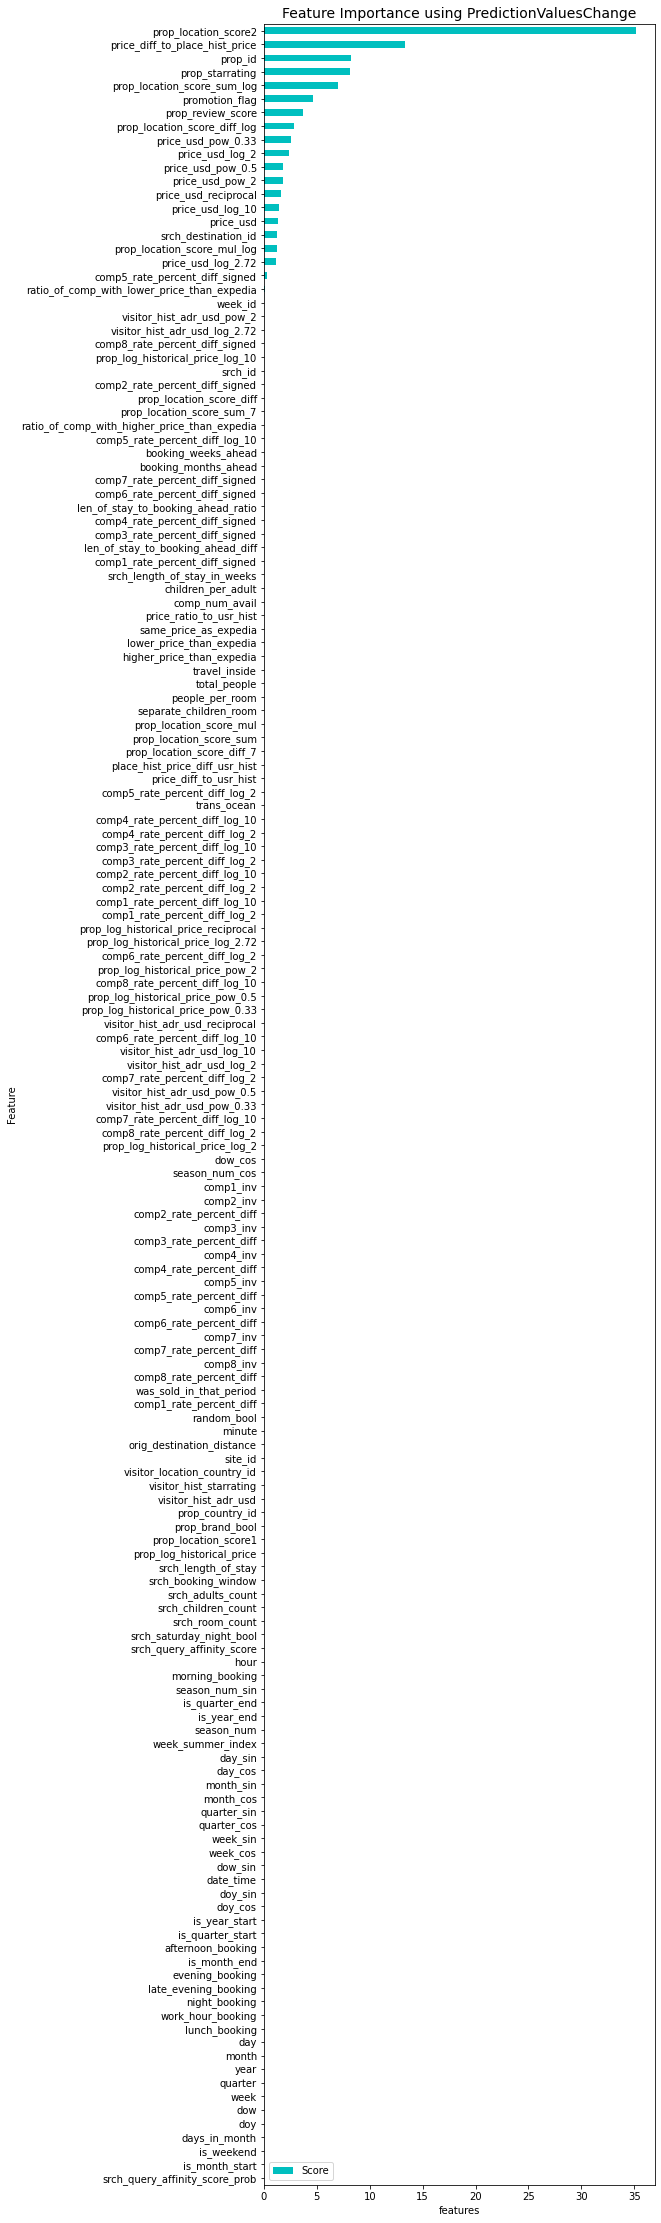

In [95]:
import matplotlib.pyplot as plt

for method in ['LossFunctionChange', 'PredictionValuesChange']:
    fi = model.get_feature_importance(test_pool, type=method)
    feature_score_raw = pd.DataFrame(list(zip(X_test.columns, fi)),
                                     columns=['Feature', 'Score'])

    feature_score = feature_score_raw.sort_values(
        by='Score', ascending=False)

    plt.rcParams["figure.figsize"] = (7, len(feature_score) / 4)
    ax = feature_score.plot('Feature', 'Score', kind='barh', color='c')
    ax.set_title("Feature Importance using {}".format(method), fontsize=14)
    ax.set_xlabel("features")
    ax.invert_yaxis()
    plt.show()

# Retrain the model on train+val, with test set as eval. The hyper parameters are frozen!

# Make preds

In [96]:
subm_df = pd.read_pickle(os.path.join(data_path, 'submission_df_preprocessed.pickle'))

In [97]:
# from feature_engine.preprocessing import MatchVariables

# match_columns = MatchVariables()

# match_columns.fit(X_train)

# df_transformed = match_columns.transform(subm_df)

In [98]:
subm_name = 'submissions/submission_5.csv'

In [100]:
subm_pool = Pool(
    data=subm_df,
    group_id=subm_df[group_col],
    cat_features=CAT_FEATURES,
)

output_df = predict_in_format(model, subm_df, subm_pool, group_col, predict_item_col)
output_df.head(10)

,srch_id,prop_id,pred
5,1,28181,2.361497
9,1,54937,2.288997
23,1,99484,2.285225
12,1,61934,2.051194
4,1,24194,1.806820
19,1,89466,1.632934
6,1,34263,1.609079
13,1,63894,1.536618
25,1,128085,1.535762
18,1,82231,1.518058


In [101]:
output_df[[group_col, 'prop_id']].to_csv(subm_name, index=False)
pd.read_csv(subm_name, nrows=10)

,srch_id,prop_id
0,1,28181
1,1,54937
2,1,99484
3,1,61934
4,1,24194
5,1,89466
6,1,34263
7,1,63894
8,1,128085
9,1,82231


Score: 0.33767  
something is wrong